# Data structures accepted by seaborn

As a data visualization library, seaborn requires that you provide it with data. This chapter explains the various ways to accomplish that task. Seaborn supports several different dataset formats, and most functions accept data represented with objects from the pandas or numpy libraries as well as built-in Python types like lists and dictionaries. Understanding the usage patterns associated with these different options will help you quickly create useful visualizations for nearly any dataset.



## Long-form vs. wide-form data

Most plotting functions in seaborn are oriented towards vectors of data. When plotting *x* against *y*, each variable should be a vector. Seaborn accepts data sets that have more than one vector organized in some tabular fashion. There is a fundamental distinction between “long-form” and “wide-form” data tables, and seaborn will treat each differently.



### Long-format data

A long-format data has the following characteristics:

* Each variable is a column

* Each observation is a row

As a simple example, consider the “flights” dataset, which records the number of airline passengers who flew in each month from 1949 to 1960. This dataset has three variables (year, month, and number of passengers):



In [3]:
import seaborn as sns

flights = sns.load_dataset("flights")

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


With long-form data, columns in the table are given roles in the plot by explicitly assigning them to one of the variables. For example, making a monthly plot of the number of passengers per year looks like this:



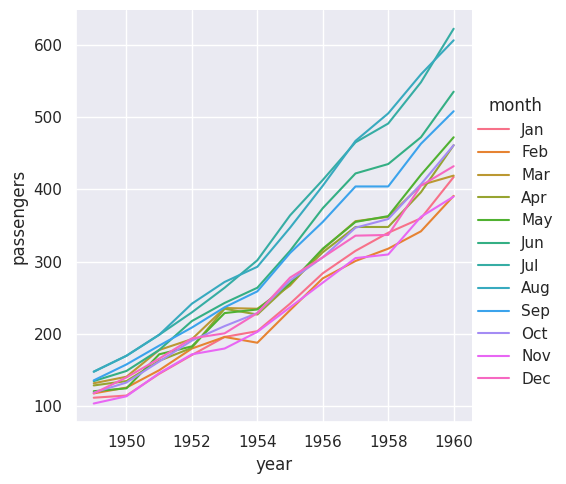

In [5]:
sns.set_theme()

sns.relplot(
    data=flights,
    x="year",
    y="passengers",
    hue="month",
    kind="line"
)

The advantage of long-form data is that it lends itself well to this explicit specification of the plot. It can accommodate datasets of arbitrary complexity, so long as the variables and observations can be clearly defined. But this format takes some getting used to, because it is often not the model of the data that one has in their head.

### Wide-form data

For simple datasets, it is often more intuitive to think about data the way it might be viewed in a spreadsheet, where the columns and rows contain levels of different variables. For example, we can convert the flights dataset into a wide-form organization by “pivoting” it so that each column has each month’s time series over years:



In [7]:
flights_wide = flights.pivot(index="year",
                             columns = "month",
                             values = "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


Here we have the same three variables, but they are organized differently. The variables in this dataset are linked to the dimensions of the table, rather than to named fields. Each observation is defined by both the value at a cell in the table and the coordinates of that cell with respect to the row and column indices.

With long-form data, we can access variables in the dataset by their name. That is not the case with wide-form data. Nevertheless, because there is a clear association between the dimensions of the table and the variable in the dataset, seaborn is able to assign those variables roles in the plot.

**Note: Seaborn treats the argument to *data* as wide form when neither *x* nor *y* are assigned.**




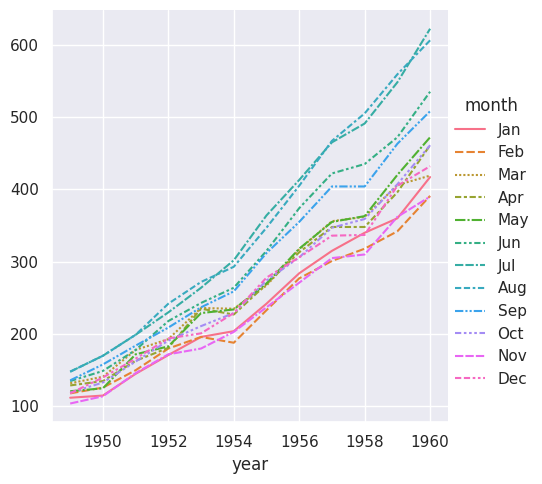

In [8]:
sns.relplot(data=flights_wide,
            kind="line")

This plot looks very similar to the one before. Seaborn has assigned the index of the dataframe to x, the values of the dataframe to y, and it has drawn a separate line for each month. There is a notable difference between the two plots, however. When the dataset went through the “pivot” operation that converted it from long-form to wide-form, the information about what the values mean was lost. As a result, there is no y axis label. (The lines also have dashes here, because relplot() has mapped the column variable to both the hue and style semantic so that the plot is more accessible. We didn’t do that in the long-form case, but we could have by setting style="month").

Thus far, we did much less typing while using wide-form data and made nearly the same plot. This seems easier! But a big advantage of long-form data is that, once you have the data in the correct format, you no longer need to think about its structure. You can design your plots by thinking only about the variables contained within it. For example, to draw lines that represent the monthly time series for each year, simply reassign the variables:





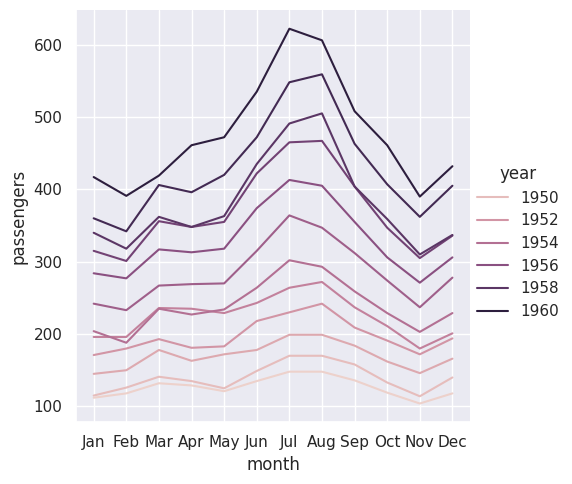

In [10]:
sns.relplot(
    data=flights,
    x="month",
    y="passengers",
    hue="year",
    kind="line"
)

To achieve the same remapping with the wide-form dataset, we would need to transpose the table:



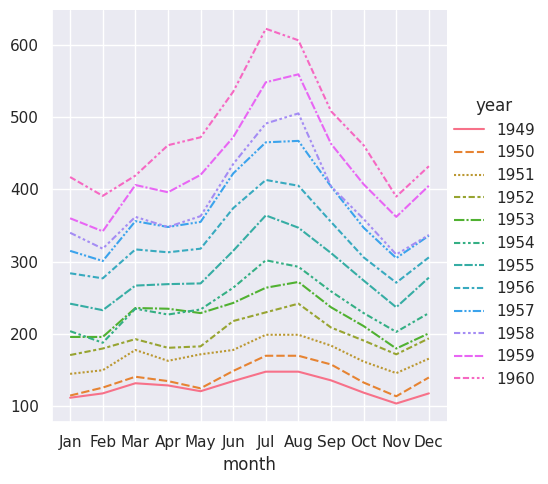

In [11]:
sns.relplot(
    data=flights_wide.transpose(),
    kind="line"
)

(This example also illustrates another wrinkle, which is that seaborn currently considers the column variable in a wide-form dataset to be categorical regardless of its datatype, whereas, because the long-form variable is numeric, it is assigned a quantitative color palette and legend. This may change in the future).

The absence of explicit variable assignments also means that each plot type needs to define a fixed mapping between the dimensions of the wide-form data and the roles in the plot. Because this natural mapping may vary across plot types, the results are less predictable when using wide-form data. For example, the categorical plots assign the *column* dimension of the table to *x* and then aggregate across the rows (ignoring the index):





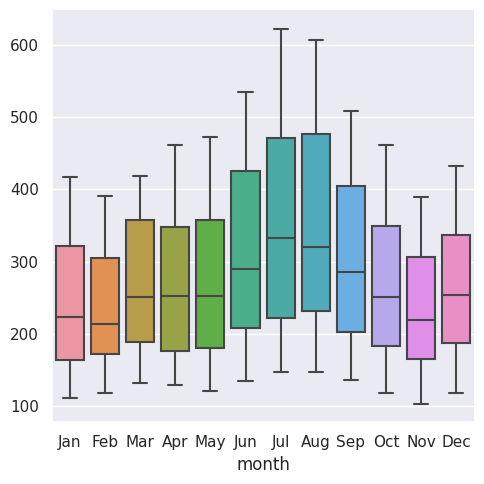

In [12]:
sns.catplot(
    data=flights_wide,
    kind="box")


When using pandas to represent wide-form data, you are limited to just a few variables (no more than three). This is because seaborn does not make use of multi-index information, which is how pandas represents additional variables in a tabular format. The xarray project offers labeled N-dimensional array objects, which can be considered a generalization of wide-form data to higher dimensions. At present, seaborn does not directly support objects from *xarray*, but they can be transformed into a long-form **pandas.DataFrame** using the *to_pandas method* and then plotted in seaborn like any other long-form data set.

In summary, we can think of long-form and wide-form datasets as looking something like this:





In [13]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving Long_wide_format.png to Long_wide_format.png


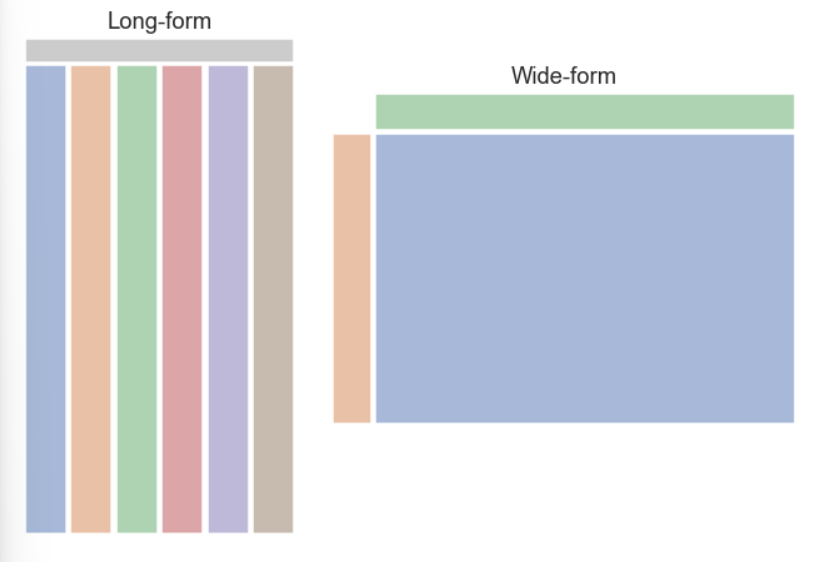

In [14]:
Image('Long_wide_format.png', width = 550)

### Messy Data

Many datasets cannot be clearly interpreted using either long-form or wide-form rules. If datasets that are clearly long-form or wide-form are “tidy”, we might say that these more ambiguous datasets are “messy”. In a messy dataset, the variables are neither uniquely defined by the keys nor by the dimensions of the table. This often occurs with *repeated-measures data*, where it is natural to organize a table such that each row corresponds to the unit of data collection. Consider this simple dataset from a psychology experiment in which twenty subjects performed a memory task where they studied anagrams while their attention was either divided or focused:





In [15]:
anagrams = sns.load_dataset("anagrams")
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


The attention variable is *between-subjects*, but there is also a *within-subjects* variable: the number of possible solutions to the anagrams, which varied from 1 to 3. The dependent measure is a score of memory performance. These two variables (number and score) are jointly encoded across several columns. As a result, the whole dataset is neither clearly long-form nor clearly wide-form.

How might we tell seaborn to plot the average score as a function of attention and number of solutions? We’d first need to coerce the data into one of our two structures. Let’s transform it to a tidy long-form table, such that each variable is a column and each row is an observation. We can use the method **pandas.DataFrame.melt()** to accomplish this task:



In [17]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"],
                              var_name="solutions",
                              value_name="score")
anagrams_long.head()

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


Now we can make the plot that we want:



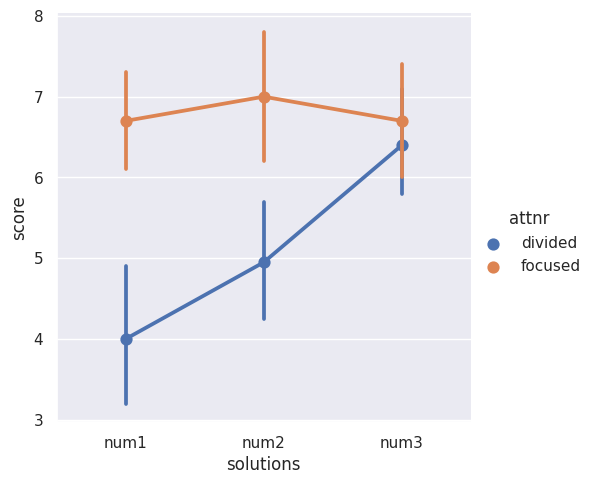

In [18]:
sns.catplot(
    data=anagrams_long,
    x="solutions",
    y="score",
    hue="attnr",
    kind="point")

### Further reading and take-home points

For a longer discussion about tabular data structures, you could read the “Tidy Data” paper by Hadley Whickham. Note that seaborn uses a slightly different set of concepts than are defined in the paper. While the paper associates tidyness with long-form structure, we have drawn a distinction between “tidy wide-form” data, where there is a clear mapping between variables in the dataset and the dimensions of the table, and “messy data”, where no such mapping exists.

The long-form structure has clear advantages. It allows you to create figures by explicitly assigning variables in the dataset to roles in plot, and you can do so with more than three variables. **When possible, try to represent your data with a long-form structure when embarking on serious analysis.** Most of the examples in the seaborn documentation will use long-form data. But in cases where it is more natural to keep the dataset wide, remember that seaborn can remain useful.






## Options for visualizing long-form data

While long-form data has a precise definition, seaborn is fairly flexible in terms of how it is actually organized across the data structures in memory. The examples in the rest of the documentation will typically use **pandas.DataFrame** objects and reference variables in them by assigning names of their columns to the variables in the plot. But it is also possible to store vectors in a Python dictionary or a class that implements that interface:




In [33]:
flights_dict = flights.to_dict()
flights_dict.keys()


dict_keys(['year', 'month', 'passengers'])

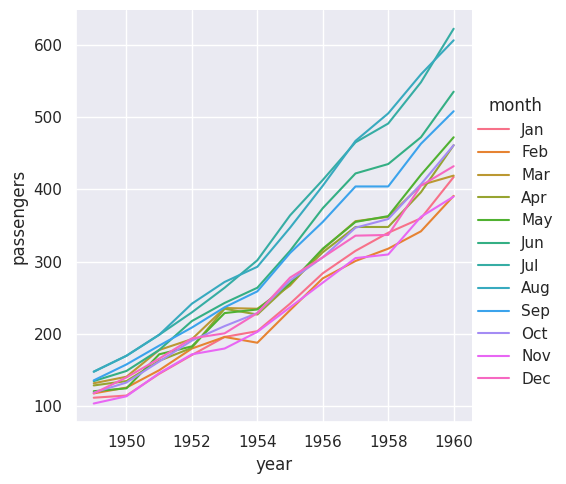

In [34]:
sns.relplot(
    data=flights_dict,
    x="year",
    y="passengers",
    hue="month",
    kind="line"
)

Many pandas operations, such as the split-apply-combine operations of a group-by, will produce a dataframe where information has moved from the columns of the input dataframe to the index of the output. So long as the name is retained, you can still reference the data as normal:



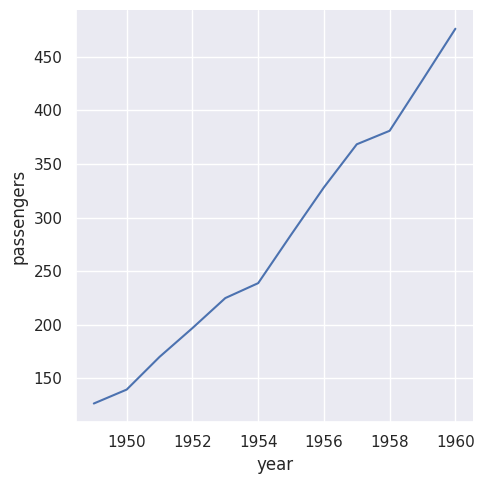

In [36]:
flights_avg = flights.groupby("year").mean(numeric_only=True)
sns.relplot(
    data=flights_avg,
    x="year",
    y="passengers",
    kind="line")

Additionally, it’s possible to pass vectors of data directly as arguments to *x*, *y*, and other plotting variables. If these vectors are pandas objects, the *name* attribute will be used to label the plot:



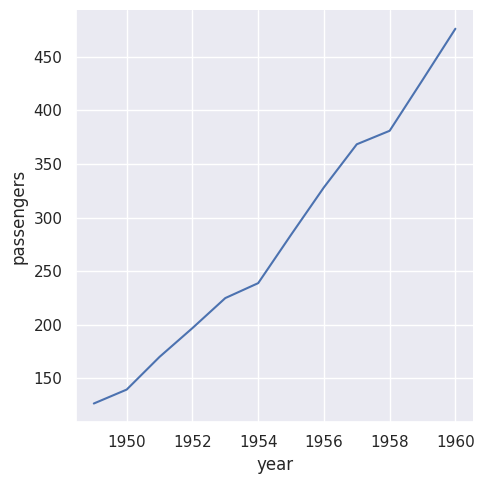

In [38]:
year = flights_avg.index
passengers = flights_avg["passengers"]
sns.relplot(
    x=year,
    y=passengers,
    kind="line"
)

Numpy arrays and other objects that implement the Python sequence interface work too, but if they don’t have names, the plot will not be as informative without further tweaking:



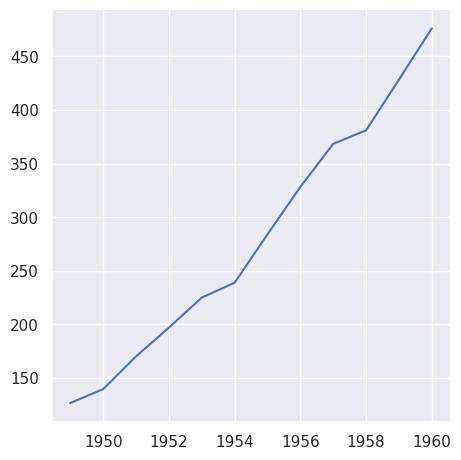

In [39]:
sns.relplot(
    x=year.to_numpy(),
    y=passengers.to_list(),
    kind="line"
)

## Options for visualizing wide-form data

The options for passing wide-form data are even more flexible. As with long-form data, pandas objects are preferable because the name (and, in some cases, index) information can be used. But in essence, any format that can be viewed as a single vector or a collection of vectors can be passed to *data*, and a valid plot can usually be constructed.

The example we saw above used a rectangular **pandas.DataFrame**, which can be thought of as a collection of its columns. A dict or list of pandas objects will also work, but we’ll lose the axis labels:





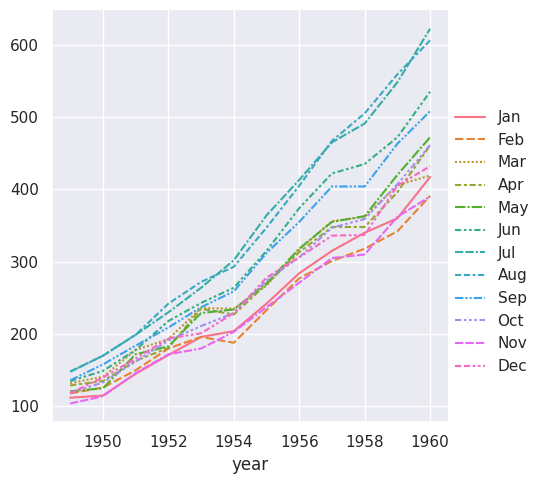

In [41]:
flights_wide_list = [col for _, col in flights_wide.items()]
sns.relplot(data=flights_wide_list, kind = "line")

The vectors in a collection do not need to have the same length. If they have an *index*, it will be used to align them:



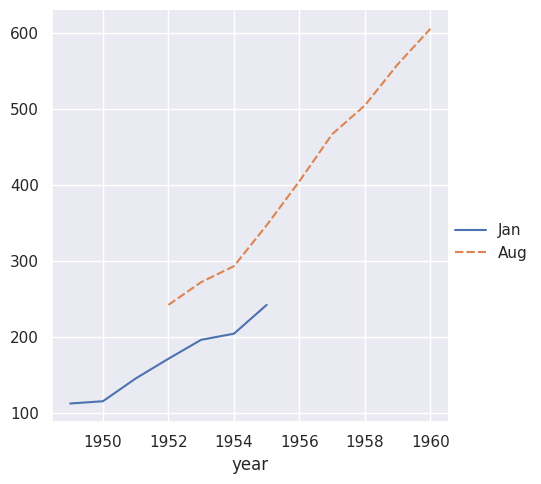

In [44]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(data=two_series, kind = "line")

Whereas an ordinal index will be used for numpy arrays or simple Python sequences:



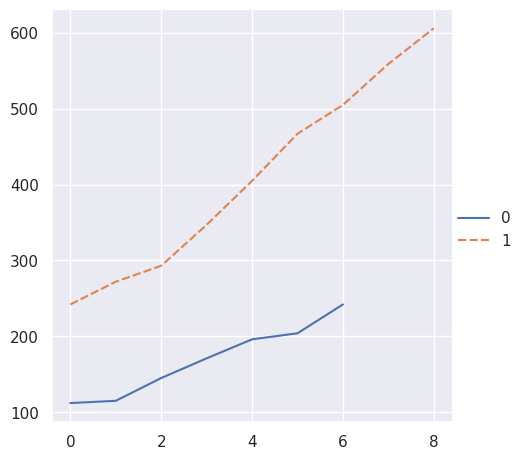

In [45]:
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(
    data = two_arrays,
    kind = "line")

But a dictionary of such vectors will at least use the keys:



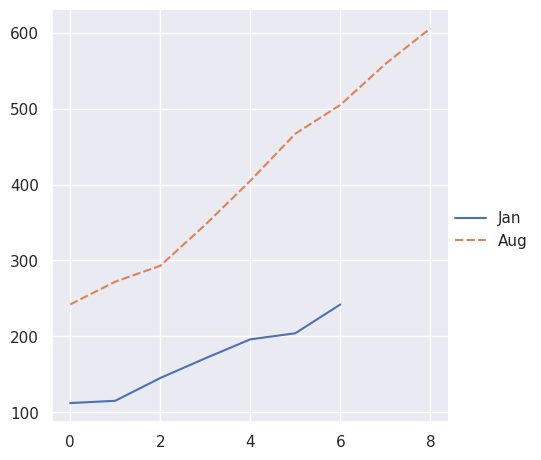

In [46]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind = "line")

Rectangular numpy arrays are treated just like a dataframe without index information, so they are viewed as a collection of column vectors. Note that this is different from how numpy indexing operations work, where a single indexer will access a row. But it is consistent with how pandas would turn the array into a dataframe or how matplotlib would plot it:



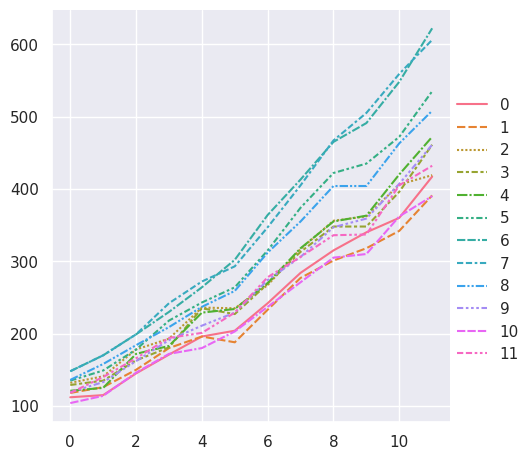

In [49]:
flights_array = flights_wide.to_numpy()
sns.relplot(
    data=flights_array,
    kind = "line")